In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import os

In [415]:
# Configurations

# Single-node or cluster-setup
singleNode=False

if singleNode: 
    distributionMode="single" 
else: 
    distributionMode="cluster"

# Application-centric benchmark or ordered benchmark for different types (to check for performance on single queries)
mixed=False

# If ordered benchmark; determine whether to examine spatial or spatio-temporal queries
spatial=False

cutOff=0
if singleNode: 
    cutOff=10
else: 
    cutOff=30
    
run_number = 1

plot_dir_name="plots"
os.makedirs(plot_dir_name, exist_ok=True)


# Single-node paths
mongodb_single_path = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\{run_number}.mongo_benchmark_execution_logs_mixed.txt"
mobilitydb_single_path = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\{run_number}.sql_benchmark_execution_logs_mixed.txt"
mongodb_single_path_spatiotemporal = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\{run_number}.mongo_benchmark_execution_logs_spatiotemporal.txt"
mongodb_single_path_spatial = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\{run_number}.mongo_benchmark_execution_logs_spatial.txt"
mobilitydb_single_path_spatiotemporal = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\{run_number}.sql_benchmark_execution_logs_spatiotemporal.txt"
mobilitydb_single_path_spatial = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\{run_number}.sql_benchmark_execution_logs_spatial.txt"



# Cluster setup paths
mongodb_cluster_path = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\cluster\{run_number}.mongo_benchmark_execution_logs_mixed.txt"
mobilitydb_cluster_path = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\cluster\{run_number}.sql_benchmark_execution_logs_mixed.txt"
mongodb_cluster_path_spatiotemporal = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\cluster\{run_number}.mongo_benchmark_execution_logs_spatiotemporal.txt"
mongodb_cluster_path_spatial = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\cluster\{run_number}.mongo_benchmark_execution_logs_spatial.txt"
mobilitydb_cluster_path_spatiotemporal = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\cluster\{run_number}.sql_benchmark_execution_logs_spatiotemporal.txt"
mobilitydb_cluster_path_spatial = fr"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\cluster\{run_number}.sql_benchmark_execution_logs_spatial.txt"



In [416]:
def compute_avg_latency(df, query_name, singleNode):
    if singleNode: 
        cutOff = 10
    else:
        cutOff = 30

    df_query = df[df['queryName'] == query_name].sort_values('latency')

    if len(df_query) > 4:
        df_query = df_query.iloc[cutOff:-cutOff]  

    if len(df_query) < 4:  
        return None

    # Compute Q1, Q3, and IQR
    Q1 = np.percentile(df_query['latency'], 25)
    Q3 = np.percentile(df_query['latency'], 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df_query[(df_query['latency'] >= lower_bound) & (df_query['latency'] <= upper_bound)]

    return df_filtered['latency'].mean() if not df_filtered.empty else None


In [417]:
if singleNode:
    if mixed:
        mongodb_path=mongodb_single_path
        mobilitydb_path=mobilitydb_single_path
    else:
        if spatial:
            mongodb_path=mongodb_single_path_spatial
            mobilitydb_path=mobilitydb_single_path_spatial
        else: 
            mongodb_path=mongodb_single_path_spatiotemporal
            mobilitydb_path=mobilitydb_single_path_spatiotemporal
else:
    if mixed:
        mongodb_path=mongodb_cluster_path
        mobilitydb_path=mobilitydb_cluster_path
    else:
        if spatial:
            mongodb_path=mongodb_cluster_path_spatial
            mobilitydb_path=mobilitydb_cluster_path_spatial
        else: 
            mongodb_path=mongodb_cluster_path_spatiotemporal
            mobilitydb_path=mobilitydb_cluster_path_spatiotemporal

        
# create dataframes for both SUTs from the respective paths
mongodb_df = pd.read_csv(mongodb_path, skiprows=1)
mobilitydb_df = pd.read_csv(mobilitydb_path, skiprows=1)

# List of columns to drop
columns_to_drop = ['fetchedRecords', 'round', 'executionIndex']

# Drop columns only if they exist in the DataFrame
mongodb_df = mongodb_df.drop(columns=[col for col in columns_to_drop if col in mongodb_df.columns], axis=1)
mobilitydb_df = mobilitydb_df.drop(columns=[col for col in columns_to_drop if col in mobilitydb_df.columns], axis=1)

with open(mongodb_path, "r", encoding="utf-8") as file:
    mongodb_first_line = file.readline().strip()  

with open(mobilitydb_path, "r", encoding="utf-8") as file:
    mobilitydb_first_line = file.readline().strip()  



# define queries to evaluate
spatialQueries=["countFlightsInCounties","flightsCloseToMainCitiesLowAltitude","flightClosestToPoint"]

spatiotemporalQueries=["flightsInCountyInPeriod","countFlightsAtInstantInDistricts","inCityRadiusInPeriod",
                       "flightDurationInMunicipalityLowAltitudeInPeriod","averageHourlyFlightsDuringDayInMunicipality",
                       "flightsWithLocalOriginDestinationInPeriodInCounty"]

spatialQuery="countFlightsInCounties"
spatiotemporalQuery="flightsInCountyInPeriod"

print("Meta Info for Benchmark run of MongoDB:")
print()
print(mongodb_first_line)

print()
print()

print("Meta Info for Benchmark run of MobilityDB:")
print()
print(mobilitydb_first_line)

mongodb_df.head()

Meta Info for Benchmark run of MongoDB:

start: Sun Feb 09 22:39:35 CET 2025, end: Sun Feb 09 23:09:21 CET 2025, duration (s): 1786. SUT: MongoDB, #threads: 32, #nodes: 3, queries executed: 1800. Seed: 1500


Meta Info for Benchmark run of MobilityDB:

start: Tue Feb 11 22:57:05 CET 2025, end: Tue Feb 11 23:49:47 CET 2025, duration (s): 3161. SUT: MobilityDB, #threads: 8, #nodes: 3, queries executed: 1800. Seed: 1500


,threadName,queryName,queryType,parameterValues,startFirstQuery,endFirstQuery,startSecQuery,endSecQuery,latency
0,thread-12,flightsInCountyInPeriod,spatiotemporal,[2023-07-25 06:01:07/ 2023-07-27 15:54:24];Krs...,1739137175595,1739137175761,1739137175761,1739137207658,32063
1,thread-31,flightsInCountyInPeriod,spatiotemporal,[2023-02-06 05:00:10/ 2023-02-10 01:32:07];Krs...,1739137175595,1739137175753,1739137175753,1739137213798,38203
2,thread-16,flightsInCountyInPeriod,spatiotemporal,[2023-01-16 01:48:20/ 2023-01-28 11:05:36];Krs...,1739137175596,1739137175740,1739137175740,1739137215953,40357
3,thread-9,flightsInCountyInPeriod,spatiotemporal,[2023-06-12 11:57:39/ 2023-06-18 05:59:54];Krs...,1739137175595,1739137175750,1739137175750,1739137216809,41214
4,thread-24,flightsInCountyInPeriod,spatiotemporal,[2023-08-16 20:51:36/ 2023-08-22 09:27:36];Krs...,1739137175593,1739137175729,1739137175729,1739137217942,42349


## Get basic performance metrics (latency mean, latency percentiles, latency variance)

In [418]:
# Compute latency statistics for MongoDB
average_latency_mongodb = mongodb_df['latency'].mean()
percentile_90_mongodb = np.percentile(mongodb_df['latency'], 90)
percentile_99_mongodb = np.percentile(mongodb_df['latency'], 99)
std_mongodb = mongodb_df['latency'].std()


# Find the rows with minimum and maximum latency for MongoDB
min_latency_row_mongodb = mongodb_df[mongodb_df['latency'] == mongodb_df['latency'].min()]
max_latency_row_mongodb = mongodb_df[mongodb_df['latency'] == mongodb_df['latency'].max()]

# Print these statistics
print(f"Average Latency for all queries (MongoDB): {average_latency_mongodb}")
print(f"90th-percentile for all queries (MongoDB): {percentile_90_mongodb}")
print(f"99th-percentile for all queries (MongoDB): {percentile_99_mongodb}")
print(f"Latency std for all queries (MongoDB): {std_mongodb}")

print("\nRow with Minimum Latency (MongoDB):")
print(min_latency_row_mongodb)
print("\nRow with Maximum Latency (MongoDB):")
print(max_latency_row_mongodb)

print()
print()
print("--------------------------------------------------------------------------------------")
print()
print()

# Compute latency statistics for MongoDB
average_latency_mobilitydb = mobilitydb_df['latency'].mean()
percentile_90_mobilitydb = np.percentile(mobilitydb_df['latency'], 90)
percentile_99_mobilitydb = np.percentile(mobilitydb_df['latency'], 99)
std_mobilitydb = mobilitydb_df['latency'].std()


# Find the rows with minimum and maximum latency for MongoDB
min_latency_row_mobilitydb = mobilitydb_df[mobilitydb_df['latency'] == mobilitydb_df['latency'].min()]
max_latency_row_mobilitydb = mobilitydb_df[mobilitydb_df['latency'] == mobilitydb_df['latency'].max()]

# Print these statistics
print(f"Average Latency for all queries (MobilityDB): {average_latency_mobilitydb}")
print(f"90th-percentile for all queries (MobilityDB): {percentile_90_mobilitydb}")
print(f"99th-percentile for all queries (MobilityDB): {percentile_99_mobilitydb}")
print(f"Latency std for all queries (MobilityDB): {std_mobilitydb}")
print("\nRow with Minimum Latency (MobilityDB):")
print(min_latency_row_mobilitydb)
print("\nRow with Maximum Latency (MobilityDB):")
print(max_latency_row_mobilitydb)


Average Latency for all queries (MongoDB): 31589.759444444444
90th-percentile for all queries (MongoDB): 96081.30000000006
99th-percentile for all queries (MongoDB): 204761.49
Latency std for all queries (MongoDB): 47943.16326419242

Row with Minimum Latency (MongoDB):
    threadName                         queryName       queryType  \
376  thread-14  countFlightsAtInstantInDistricts  spatiotemporal   
700   thread-6              inCityRadiusInPeriod  spatiotemporal   

                                       parameterValues  startFirstQuery  \
376                                2023-05-14 01:41:01    1739137896633   
700  [2023-01-01 00:15:15/ 2023-01-01 01:01:01];War...    1739138024703   

     endFirstQuery  startSecQuery    endSecQuery  latency  
376  1739137896660  1739137896662  1739137896700       67  
700  1739138024739  1739138024740  1739138024770       67  

Row with Maximum Latency (MongoDB):
    threadName                queryName       queryType  \
911  thread-15  flights

## Evaluate spatio-temporal queries for application-centric (mixed) benchmarks

In [419]:
# Get statistics for different query types individually for both Databases (only executed for application-centric (mixed) benchmark)

# For MongoDB
df = mongodb_df
if mixed:  
    spatiotemporal_df = df[df['queryType'] == 'spatiotemporal']

    # Compute statistics
    average_latency = spatiotemporal_df['latency'].mean()
    percentile_90 = np.percentile(spatiotemporal_df['latency'], 90)
    percentile_99 = np.percentile(spatiotemporal_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].min()]
    max_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].max()]

    # Print results
    print(f"Spatio-Temporal Query Count (MongoDB): {len(spatiotemporal_df)}")
    print(f"Average Latency for spatiotemporal queries (MongoDB): {average_latency}")
    print(f"90th-percentile latency (MongoDB): {percentile_90}")
    print(f"99th-percentile latency (MongoDB): {percentile_99}")
    print("\nRow with Minimum Latency (MongoDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MongoDB):")
    print(max_latency_row)

    
    
print()
print()
print("--------------------------------------------------------------------------------------")
print()
print()
  
# For MobilityDB
df = mobilitydb_df
if mixed:  
    spatiotemporal_df = df[df['queryType'] == 'spatiotemporal']

    # Compute statistics
    average_latency = spatiotemporal_df['latency'].mean()
    percentile_90 = np.percentile(spatiotemporal_df['latency'], 90)
    percentile_99 = np.percentile(spatiotemporal_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].min()]
    max_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].max()]

    # Print results
    print(f"Spatio-Temporal Query Count (MobilityDB): {len(spatiotemporal_df)}")
    print(f"Average Latency for spatiotemporal queries (MobilityDB): {average_latency}")
    print(f"90th-percentile latency (MobilityDB): {percentile_90}")
    print(f"99th-percentile latency (MobilityDB): {percentile_99}")
    print("\nRow with Minimum Latency (MobilityDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MobilityDB):")
    print(max_latency_row)
    



--------------------------------------------------------------------------------------




## Evaluate spatial queries for application-centric (mixed) benchmarks

In [420]:
# Get statistics for different query types individually for both Databases (only executed for application-centric (mixed) benchmark)

# For MongoDB
df = mongodb_df
if mixed:  
    spatial_df = df[df['queryType'] == 'spatial']

    # Compute statistics
    average_latency = spatial_df['latency'].mean()
    percentile_90 = np.percentile(spatial_df['latency'], 90)
    percentile_99 = np.percentile(spatial_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = spatial_df[spatial_df['latency'] == spatial_df['latency'].min()]
    max_latency_row = spatial_df[spatial_df['latency'] == spatial_df['latency'].max()]

    # Print results
    print(f"Spatial Query Count (MongoDB): {len(spatial_df)}")
    print(f"Average Latency for spatial queries (MongoDB): {average_latency}")
    print(f"90th-percentile latency (MongoDB): {percentile_90}")
    print(f"99th-percentile latency (MongoDB): {percentile_99}")
    print("\nRow with Minimum Latency (MongoDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MongoDB):")
    print(max_latency_row)

    
    
print()
print()
print("--------------------------------------------------------------------------------------")
print()
print()
  
# For MobilityDB
df = mobilitydb_df
if mixed:  
    spatial_df = df[df['queryType'] == 'spatial']

    # Compute statistics
    average_latency = spatial_df['latency'].mean()
    percentile_90 = np.percentile(spatial_df['latency'], 90)
    percentile_99 = np.percentile(spatial_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = spatial_df[spatial_df['latency'] == spatial_df['latency'].min()]
    max_latency_row = spatial_df[spatial_df['latency'] == spatial_df['latency'].max()]

    # Print results
    print(f"Spatial Query Count (MobilityDB): {len(spatial_df)}")
    print(f"Average Latency for spatial queries (MobilityDB): {average_latency}")
    print(f"90th-percentile latency (MobilityDB): {percentile_90}")
    print(f"99th-percentile latency (MobilityDB): {percentile_99}")
    print("\nRow with Minimum Latency (MobilityDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MobilityDB):")
    print(max_latency_row)
    



--------------------------------------------------------------------------------------




## Evaluate temporal queries for application-centric (mixed) benchmarks

In [421]:
# Get statistics for different query types individually for both Databases (only executed for application-centric (mixed) benchmark)

# For MongoDB
df = mongodb_df
if mixed:  
    temporal_df = df[df['queryType'] == 'temporal']

    # Compute statistics
    average_latency = temporal_df['latency'].mean()
    percentile_90 = np.percentile(temporal_df['latency'], 90)
    percentile_99 = np.percentile(temporal_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = temporal_df[temporal_df['latency'] == temporal_df['latency'].min()]
    max_latency_row = temporal_df[temporal_df['latency'] == temporal_df['latency'].max()]

    # Print results
    print(f"Temporal Query Count (MongoDB): {len(temporal_df)}")
    print(f"Average Latency for Temporal queries (MongoDB): {average_latency}")
    print(f"90th-percentile latency (MongoDB): {percentile_90}")
    print(f"99th-percentile latency (MongoDB): {percentile_99}")
    print("\nRow with Minimum Latency (MongoDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MongoDB):")
    print(max_latency_row)

    
    
print()
print()
print("--------------------------------------------------------------------------------------")
print()
print()
  
# For MobilityDB
df = mobilitydb_df
if mixed:  
    temporal_df = df[df['queryType'] == 'temporal']

    # Compute statistics
    average_latency = temporal_df['latency'].mean()
    percentile_90 = np.percentile(temporal_df['latency'], 90)
    percentile_99 = np.percentile(temporal_df['latency'], 99)

    # Find the rows with minimum and maximum latency
    min_latency_row = temporal_df[temporal_df['latency'] == temporal_df['latency'].min()]
    max_latency_row = temporal_df[temporal_df['latency'] == temporal_df['latency'].max()]

    # Print results
    print(f"Temporal Query Count (MobilityDB): {len(spatial_df)}")
    print(f"Average Latency for temporal queries (MobilityDB): {average_latency}")
    print(f"90th-percentile latency (MobilityDB): {percentile_90}")
    print(f"99th-percentile latency (MobilityDB): {percentile_99}")
    print("\nRow with Minimum Latency (MobilityDB):")
    print(min_latency_row)
    print("\nRow with Maximum Latency (MobilityDB):")
    print(max_latency_row)
    



--------------------------------------------------------------------------------------




## Barplots for spatial queries for MongoDB vs. MobilityDB

In [422]:
if not mixed and spatial:
    mongodb_avgs = [compute_avg_latency(mongodb_df, q, singleNode) for q in spatialQueries]
    mobilitydb_avgs = [compute_avg_latency(mobilitydb_df, q, singleNode) for q in spatialQueries]
    
    x = range(len(spatialQueries))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.bar([i - width/2 for i in x], mongodb_avgs, width, color='#47A248', label='MongoDB')
    ax.bar([i + width/2 for i in x], mobilitydb_avgs, width, color='#4C89C6', label='MobilityDB')

    ax.set_xticks(x)
    ax.set_xticklabels(spatialQueries, rotation=45)
    ax.set_xlabel('Query Name')
    ax.set_ylabel('Average Latency (ms)')
    ax.legend()

    plt.tight_layout()
    
    # Ensure the output directory exists
    os.makedirs(plot_dir_name, exist_ok=True)

    # Save high-resolution PNG (DPI 300 for publication-quality)
    png_filename = os.path.join(plot_dir_name, f"{distributionMode}_averages_spatial.png")
    fig.savefig(png_filename, format="png", dpi=300, bbox_inches='tight')
    print(f"Barchart saved as: {png_filename}")

    plt.show()

## Barplots for spatiotemporal queries for MongoDB vs. MobilityDB

Average Query 8 (MongoDB): 92.9625
Average Query 8 (MobilityDB): 284.85
Barchart saved as: plots\cluster_averages_spatiotemporal.png


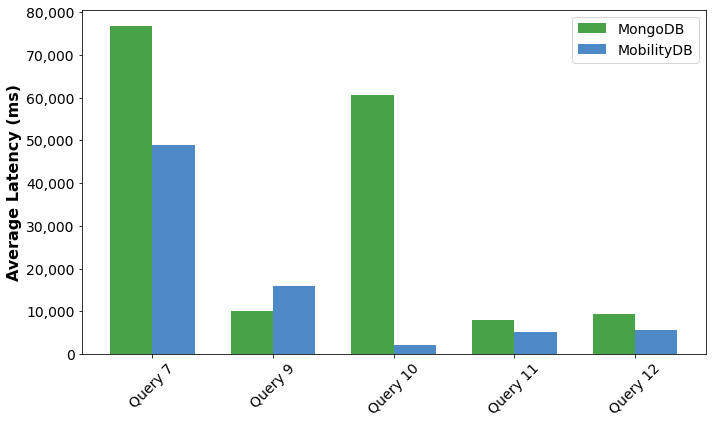

In [423]:
if not mixed and not spatial:
    barplotQueries = ["flightsInCountyInPeriod", "inCityRadiusInPeriod",
                      "flightDurationInMunicipalityLowAltitudeInPeriod", "averageHourlyFlightsDuringDayInMunicipality",
                      "flightsWithLocalOriginDestinationInPeriodInCounty"]
    
    queryNames = ["Query 7", "Query 9", "Query 10", "Query 11", "Query 12"]
    
    mongodb_avgs = [compute_avg_latency(mongodb_df, q, singleNode) for q in barplotQueries]
    mobilitydb_avgs = [compute_avg_latency(mobilitydb_df, q, singleNode) for q in barplotQueries]
    
    x = range(len(barplotQueries))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.bar([i - width/2 for i in x], mongodb_avgs, width, color='#47A248', label='MongoDB')
    ax.bar([i + width/2 for i in x], mobilitydb_avgs, width, color='#4C89C6', label='MobilityDB')
    
    ax.set_xticks(x)
    ax.set_xticklabels(queryNames, rotation=45, fontsize=14)  # Increase x-axis label size
    ax.set_ylabel('Average Latency (ms)', fontsize=16, fontweight="bold")  # Increase y-axis label size
    ax.legend(fontsize=14)

    # Increase tick sizes for both axes
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick size

    # Compute and print additional query averages
    mongodb_avg_query8 = compute_avg_latency(mongodb_df, "countFlightsAtInstantInDistricts", singleNode)
    mobilitydb_avg_query8 = compute_avg_latency(mobilitydb_df, "countFlightsAtInstantInDistricts", singleNode)

    print(f"Average Query 8 (MongoDB): {mongodb_avg_query8}")
    print(f"Average Query 8 (MobilityDB): {mobilitydb_avg_query8}")
    
    # Format y-axis numbers with thousands separator
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.tight_layout()
    
    # Ensure the output directory exists
    os.makedirs(plot_dir_name, exist_ok=True)

    # Save high-resolution PNG
    png_filename = os.path.join(plot_dir_name, f"{distributionMode}_averages_spatiotemporal.png")
    fig.savefig(png_filename, format="png", dpi=300, bbox_inches='tight')
    print(f"Barchart saved as: {png_filename}")
    
    plt.show()


## Create Lineplot for latencies

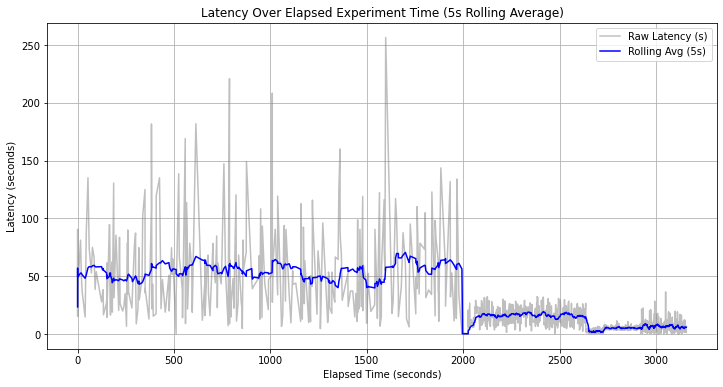

In [424]:
df['experiment_runtime'] = pd.to_datetime(df['startFirstQuery'], unit='ms')

# Convert start time to seconds
df['start_time_sec'] = df['startFirstQuery'] / 1000  # Convert ms to seconds

# Calculate elapsed time in seconds
df['elapsed_time_sec'] = df['start_time_sec'] - df['start_time_sec'].min()

# Sort values to ensure proper rolling window application
df = df.sort_values(by='elapsed_time_sec')

# Convert latency from milliseconds to seconds
df['latency_sec'] = df['latency'] / 1000  # Convert ms to sec
df['latency_rolling_sec'] = df['latency_sec'].rolling(window=20, min_periods=1).mean()

# Plot the latency curves without markers
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['elapsed_time_sec'], y=df['latency_sec'], linestyle='-', color='gray', alpha=0.5, label="Raw Latency (s)")
sns.lineplot(x=df['elapsed_time_sec'], y=df['latency_rolling_sec'], linestyle='-', color='b', label="Rolling Avg (5s)")

plt.xlabel("Elapsed Time (seconds)")
plt.ylabel("Latency (seconds)")
plt.title("Latency Over Elapsed Experiment Time (5s Rolling Average)")
plt.legend()
plt.grid(True)

plt.show()

## Create Boxplots for specific queries

### Spatial Query

In [425]:
# MongoDB
if not mixed and spatial: 
    
    # Select specific query
    filtered_df = mongodb_df[mongodb_df['queryName'] == spatialQuery]


    # removed first 2 and last 2 queries as their latency can be heavily influenced by previous/subsequent queries
    trimmed_df = filtered_df.iloc[cutOff:-cutOff] 


    max_latency = trimmed_df['latency'].max()
    min_latency = trimmed_df['latency'].min()

    max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
    min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

    # Clean parameter values: Remove "tstzspan" and replace ";" with newline for better readability
    max_param_value = max_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")
    min_param_value = min_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")

    # Step 4: Create the boxplot for the latency column
    plt.figure(figsize=(4, 6))
    ax = sns.boxplot(y=trimmed_df['latency'], color="#47A248")  # MongoDB green color

    # Formatting
    plt.title(f"Latency Distribution\n for query: {spatialQuery}\n in MongoDB", fontsize=16)
    plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
    plt.xlabel("Spatial Query", fontsize=14)

    # Increase tick labels size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add thousands separators to y-axis
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

    # Format parameter value for better readability (split into multiple paragraphs after ";")
    max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
    min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

    # Annotate the maximum latency
    plt.text(0.52, max_latency * 0.98, max_param_text, 
             ha='left', va='top', fontsize=12, fontweight="bold", color="black")

    # Annotate the minimum latency
    plt.text(0.52, min_latency * 1.05, min_param_text, 
             ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

    # Get and store the y-axis limits for the second plot
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min, y_max)

    # Show the plot
    plt.show()


In [426]:
# MobilityDB
if not mixed and spatial:

    # Select specific query
    filtered_df = mobilitydb_df[mobilitydb_df['queryName'] == spatialQuery]


    trimmed_df = filtered_df.iloc[cutOff:-cutOff] 


    max_latency = trimmed_df['latency'].max()
    min_latency = trimmed_df['latency'].min()

    max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
    min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]


    max_param_value = max_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")
    min_param_value = min_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")

    # Step 4: Create the boxplot for the latency column
    plt.figure(figsize=(4, 6))
    ax = sns.boxplot(y=trimmed_df['latency'], color="#4C89C6")  # PostgreSQL blue color


    plt.title(f"Latency Distribution\n for query {spatialQuery}\n in MobilityDB", fontsize=16)
    plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
    plt.xlabel("Spatial Query", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

    # Format parameter value for better readability (split into multiple paragraphs after ";")
    max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
    min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

    # Annotate the maximum latency
    plt.text(0.52, max_latency * 0.98, max_param_text, 
             ha='left', va='top', fontsize=12, fontweight="bold", color="black")

    # Annotate the minimum latency
    plt.text(0.52, min_latency * 1.05, min_param_text, 
             ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

    # Apply the y-axis limits from the first plot (MongoDB) to ensure consistency
    # ax.set_ylim(y_min, y_max)

    # Show the plot
    plt.show()


### Create SVGs of Boxplots for all spatial queries

In [427]:
def remove_outliers(df, column='latency'):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

queryNumber = 4

if not mixed and spatial:
    for spatialQuery in spatialQueries:
        
        mongodb_filtered_df = mongodb_df[mongodb_df['queryName'] == spatialQuery].iloc[cutOff:-cutOff]
        mobilitydb_filtered_df = mobilitydb_df[mobilitydb_df['queryName'] == spatialQuery].iloc[cutOff:-cutOff]

        mongodb_filtered_df = remove_outliers(mongodb_filtered_df)
        mobilitydb_filtered_df = remove_outliers(mobilitydb_filtered_df)

        # Add database identifiers for comparison
        mongodb_filtered_df = mongodb_filtered_df.assign(Database='MongoDB')
        mobilitydb_filtered_df = mobilitydb_filtered_df.assign(Database='MobilityDB')

        # Combine dataframes
        combined_df = pd.concat([mongodb_filtered_df, mobilitydb_filtered_df])

        # Create combined boxplot
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(x='Database', y='latency', data=combined_df, palette=["#47A248", "#4C89C6"], ax=ax)

        # Formatting
        ax.set_ylabel("Latency (ms)", fontsize=14, fontweight="bold")
        ax.set_xlabel("Database", fontsize=14, fontweight="bold")

        ax.grid(True, linestyle='--', alpha=0.6, zorder=1)
        ax.set_axisbelow(True)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

        # Format y-axis numbers with thousand separator
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

        # Compute medians and print results
        median_mongodb = mongodb_filtered_df["latency"].median() / 1000
        median_mobilitydb = mobilitydb_filtered_df["latency"].median() / 1000

        print(f"MongoDB Median Latency for Query {queryNumber}: {median_mongodb}")
        print(f"MobilityDB Median Latency for Query {queryNumber}: {median_mobilitydb}")
        print(f"Ratio for Query {queryNumber}: {median_mobilitydb / median_mongodb}")

        # Ensure the output directory exists
        os.makedirs(plot_dir_name, exist_ok=True)

        # Save as high-resolution PNG
        png_filename = os.path.join(plot_dir_name, f"{distributionMode}_query{queryNumber}.png")
        fig.savefig(png_filename, format="png", dpi=300, bbox_inches='tight')
        print(f"Boxplot saved as: {png_filename}")

        plt.show()

        queryNumber += 1


## Spatio-Temporal Query

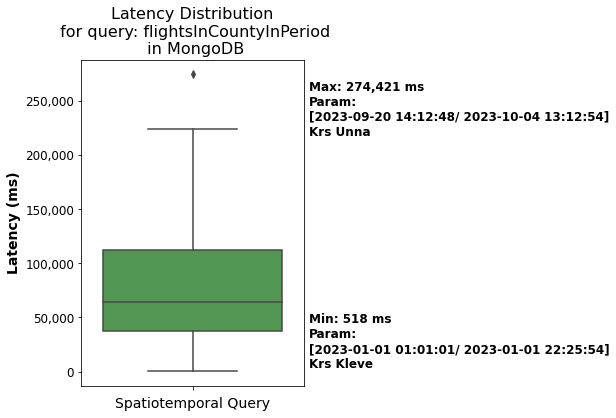

In [428]:
# MongoDB 
if not mixed and not spatial: 

    filtered_df = mongodb_df[mongodb_df['queryName'] == spatiotemporalQuery].iloc[cutOff:-cutOff]

    trimmed_df = filtered_df.iloc[2:-2] 

 
    max_latency = trimmed_df['latency'].max()
    min_latency = trimmed_df['latency'].min()

    max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
    min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

    max_param_value = max_latency_row['parameterValues'].values[0].replace(";", "\n") 
    min_param_value = min_latency_row['parameterValues'].values[0].replace(";", "\n")  

    plt.figure(figsize=(4, 6))
    ax = sns.boxplot(y=trimmed_df['latency'], color="#47A248")

    # Formatting
    plt.title(f"Latency Distribution\n for query: {spatiotemporalQuery}\n in MongoDB", fontsize=16)
    plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
    plt.xlabel("Spatiotemporal Query", fontsize=14)

    # Increase tick labels size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add thousands separators to y-axis
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

    # Format parameter value for better readability (split into multiple paragraphs after ";")
    max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
    min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

    # Annotate the maximum latency
    plt.text(0.52, max_latency * 0.98, max_param_text, 
             ha='left', va='top', fontsize=12, fontweight="bold", color="black")

    # Annotate the minimum latency
    plt.text(0.52, min_latency, min_param_text, 
             ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

    # Get and store the y-axis limits for the second plot
    y_min, y_max = ax.get_ylim()

    # Show the plot
    plt.show()


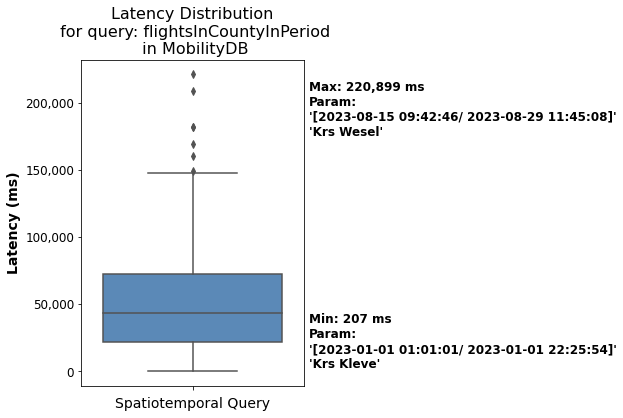

In [429]:
# MobilityDB
if not mixed and not spatial: 
    filtered_df = mobilitydb_df[mobilitydb_df['queryName'] == spatiotemporalQuery].iloc[cutOff:-cutOff]


    trimmed_df = filtered_df.iloc[2:-2]  


    max_latency = trimmed_df['latency'].max()
    min_latency = trimmed_df['latency'].min()

    max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
    min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

    max_param_value = max_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline
    min_param_value = min_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline

    # Step 4: Create the boxplot for the latency column
    plt.figure(figsize=(4, 6))
    ax = sns.boxplot(y=trimmed_df['latency'], color="#4C89C6")  # PostgreSQL/MobilityDB blue color

    # Formatting
    plt.title(f"Latency Distribution\n for query: {spatiotemporalQuery}\n in MobilityDB", fontsize=16)
    plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
    plt.xlabel("Spatiotemporal Query", fontsize=14)

    # Increase tick labels size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add thousands separators to y-axis
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

    # Format parameter value for better readability (split into multiple paragraphs after ";")
    max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value.replace('tstzspan', '')}"
    min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value.replace('tstzspan', '')}"

    # Annotate the maximum latency
    plt.text(0.52, max_latency * 0.98, max_param_text, 
             ha='left', va='top', fontsize=12, fontweight="bold", color="black")

    # Annotate the minimum latency
    plt.text(0.52, min_latency, min_param_text, 
             ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

    # Apply the y-axis limits from the first plot
    # ax.set_ylim(y_min, y_max)

    # Show the plot
    plt.show()


### Create SVGs of Boxplots for all spatiotemporal queries

MongoDB Median Latency for Query 7: 63.8895
MobilityDB Median Latency for Query 7: 43.428
Ratio for Query 7: 0.6797361068720212
Boxplot saved as: plots\cluster_query7.svg


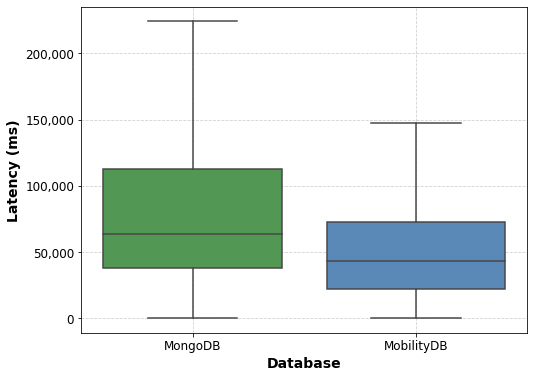

MongoDB Median Latency for Query 8: 0.0915
MobilityDB Median Latency for Query 8: 0.286
Ratio for Query 8: 3.1256830601092895
Boxplot saved as: plots\cluster_query8.svg


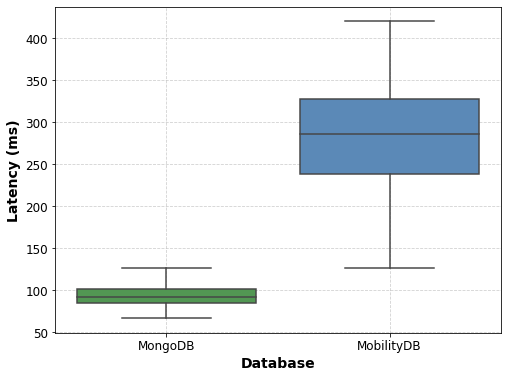

MongoDB Median Latency for Query 9: 8.616
MobilityDB Median Latency for Query 9: 16.2825
Ratio for Query 9: 1.8897980501392757
Boxplot saved as: plots\cluster_query9.svg


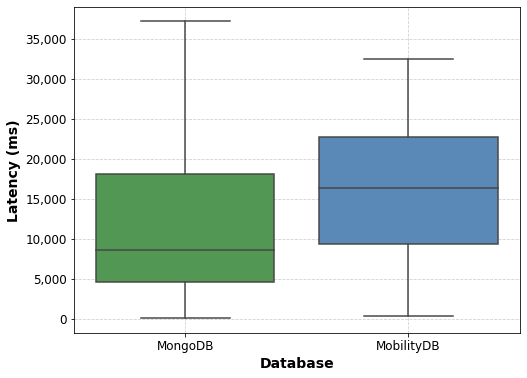

MongoDB Median Latency for Query 10: 57.2105
MobilityDB Median Latency for Query 10: 1.8935
Ratio for Query 10: 0.03309707134179914
Boxplot saved as: plots\cluster_query10.svg


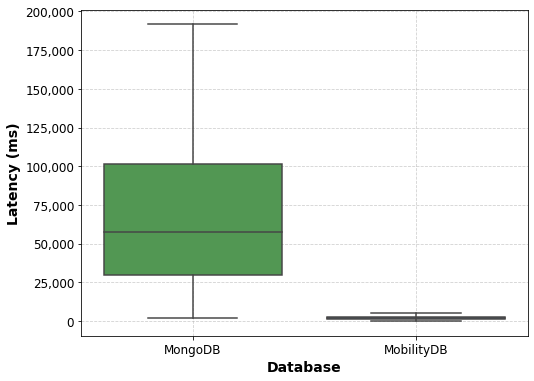

MongoDB Median Latency for Query 11: 8.2705
MobilityDB Median Latency for Query 11: 5.0155
Ratio for Query 11: 0.6064325010579772
Boxplot saved as: plots\cluster_query11.svg


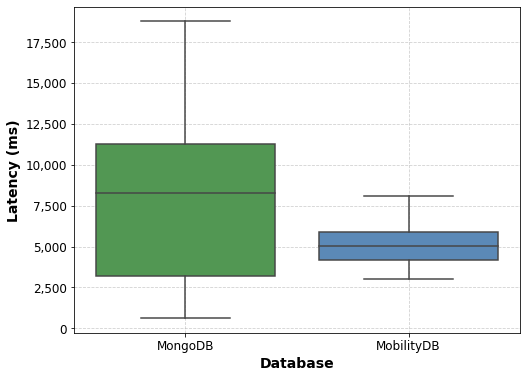

MongoDB Median Latency for Query 12: 7.6795
MobilityDB Median Latency for Query 12: 5.0835
Ratio for Query 12: 0.6619571586691841
Boxplot saved as: plots\cluster_query12.svg


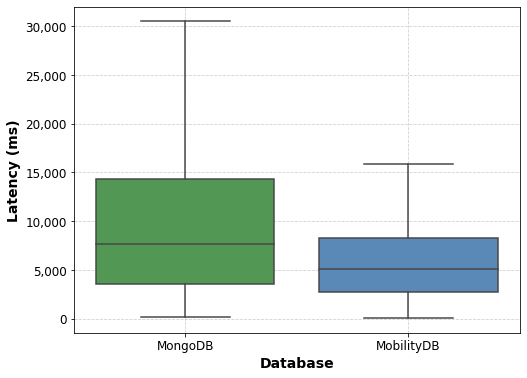

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

def remove_outliers(df, column='latency'):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


queryNumber=7

if not mixed and not spatial:
    for spatiotemporalQuery in spatiotemporalQueries:
        
        
        mongodb_filtered_df = mongodb_df[mongodb_df['queryName'] == spatiotemporalQuery].iloc[cutOff:-cutOff]
        mobilitydb_filtered_df = mobilitydb_df[mobilitydb_df['queryName'] == spatiotemporalQuery].iloc[cutOff:-cutOff]

        # Add database identifiers for comparison
        mongodb_filtered_df = mongodb_filtered_df.assign(Database='MongoDB')
        mobilitydb_filtered_df = mobilitydb_filtered_df.assign(Database='MobilityDB')

        # Combine dataframes
        combined_df = pd.concat([mongodb_filtered_df, mobilitydb_filtered_df])

        # Create figure and boxplot
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(x='Database', y='latency', data=combined_df, palette=["#47A248", "#4C89C6"], showfliers=False, ax=ax)

        # Formatting
        ax.set_ylabel("Latency (ms)", fontsize=14, fontweight="bold")
        ax.set_xlabel("Database", fontsize=14, fontweight="bold")

        # Adjust tick labels
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

        ax.grid(True, linestyle='--', alpha=0.6, zorder=1)
        ax.set_axisbelow(True)

        # Format y-axis numbers with thousand separator
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

        # Calculate medians and ratio
        median_mongodb = mongodb_filtered_df["latency"].median() / 1000
        median_mobilitydb = mobilitydb_filtered_df["latency"].median() / 1000

        print(f"MongoDB Median Latency for Query {queryNumber}: {median_mongodb}")
        print(f"MobilityDB Median Latency for Query {queryNumber}: {median_mobilitydb}")
        print(f"Ratio for Query {queryNumber}: {median_mobilitydb / median_mongodb}")

        svg_filename = os.path.join(plot_dir_name, f"{distributionMode}_query{queryNumber}.svg")
        fig.savefig(svg_filename, format="svg")
        print(f"Boxplot saved as: {svg_filename}")

        plt.show()
        
        queryNumber+=1
